<img src='../../images/wcd_logo.png' width='50%'>
-------------

<center> <h1> Python for Data Science </h1> </center>
<br>
<center><h2> Lab 1: Numpy for Numeric Computation </h2> </center>
<center><img src='../../images/numpy_logo.png' width='20%'> </center>

<br>
<center align="left"> Developed by: </center>
<center align="left"> WeCloudData Academy </center>



----------


Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this lab useful to get started with Numpy.

### Reference
 * Numpy Reference http://docs.scipy.org/doc/numpy-dev/reference/
 
> While the Python language is an excellent tool for general-purpose programming, with a highly readable syntax, rich and powerful data types (**`strings, lists, sets, dictionaries, arbitrary length integers, etc`**) and a very comprehensive standard library, it was not designed specifically for mathematical and scientific computing.  ***Neither the language nor its standard library have facilities for the efficient representation of multidimensional datasets, tools for linear algebra and general matrix manipulations *** (an essential building block of virtually all technical computing), nor any data visualization facilities.

> In particular, Python lists are very flexible containers that can be nested arbitrarily deep and which can hold any Python object in them, but they are poorly suited to represent efficiently common mathematical constructs like vectors and matrices.  In contrast, much of our modern heritage of scientific computing has been built on top of libraries written in the Fortran language, which has native support for vectors and matrices as well as a library of mathematical functions that can efficiently operate on entire arrays at once.


### Table of Contents
* 1 - Why Numpy? 
  * 1.1 Performance: list vs numpy
  * 1.2 Array/Matrix data representation
  * 1.3 Vector/Matrix Operations for Machine Learning

* 2 - Numpy Array Objects
  * 2.1 Array Objects
  * 2.2 Array Creation (Instantiation)
  * 2.3 Array Attributes
  * 2.4 Manipulating Arrays - Slicing, Indexing, Iteration
  * 2.5 Array Operations - Universal Function "unfuc"
  * 2.6 Basic Array Methods
* 3 - Numpy Routines
  * 3.1 Array Manipulation
  * 3.2 Binary Operations
  * 3.3 Stirng Operations
  * 3.4 Datetime
  * 3.5 Linear Algebra
  * 3.6 Math
  * 3.7 Statistics
  * 3.8 Sorting/Searching/Counting
  * 3.9 Input/Output

# $\Delta$ 1. Why Numpy? 

## 1.1 Performance (Numpy vs Python List)

### Numpy Array vs. Python List
> - (**memory efficenciency**) Numpy's arrays are more compact than lists 
- (**convenience**) Array is more convenient. It allows you to work with vector and matrix operations more efficiently 
- (**speed**) Numpy array operation is much faster than list
- (**functionality**) Numpy array has a lot of built-in functions to work with fast searching, basic stats, linear algebra, histogram etc.

In [184]:
# element-wise matrix multiply
a = np.random.random((5000,5000))
b = np.random.random((5000,5000))

# matrix multiplication using numpy's universal function
def mult1(a,b):
    return a * b

# elementwise matrix multiply using loops -  !!!should always avoid for loops!!
def multloop(a,b):
    c = np.empty(a.shape)
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            c[i,j] = a[i,j] * b [i,j]
    return c

In [9]:
import numpy as np
import timeit

%timeit mult1(a,b)

10 loops, best of 3: 127 ms per loop


In [10]:
%timeit multloop(a,b)

1 loop, best of 3: 15.7 s per loop


#### Explanations
From [Wikiperdia](https://en.wikipedia.org/wiki/NumPy):

NumPy address the slowness problem partly by providing multidimensional arrays and functions and operators that operate efficiently on arrays, requiring (re)writing some code, mostly inner loops using NumPy.

Using NumPy in Python gives functionality comparable to MATLAB since they are both interpreted, and they both allow the user to write fast programs as long as most operations work on arrays or matrices instead of scalars.

## 1.2 Array/Matrix Data Representation

#### Visualize the MNIST handwritten digit data

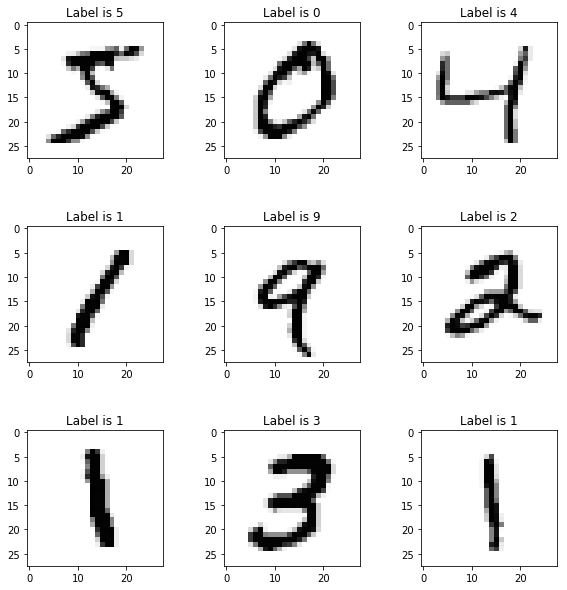

In [52]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

f = open("../../data/mnist_train_100.csv", 'r')  # In this tutorial, the mnist sample is stored in csv format
mnist = f.readlines()
f.close()

# Use matplotlib to visualize the digits
f = plt.figure(figsize=(10,10))
count=0
for line in mnist[:9]:
    count += 1
    linebits = line.split(',')
    imarray = np.asfarray(linebits[1:]).reshape((28,28))
    plt.subplot(3,3,count)
    plt.subplots_adjust(hspace=0.5)
    plt.title("Label is " + linebits[0])
    plt.imshow(imarray, cmap='Greys', interpolation='None')


#### Displaying the digits which are 28x28 pixel ndarrays

In [49]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:120% !important; }</style>"))

np.get_printoptions()['linewidth']
np.set_printoptions(linewidth=200)

digit = np.asfarray(mnist[0].split(',')[1:]).reshape((28,28))
print(digit)


[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    3.   18.   18.   18.  126.  136.  175.   26.  166.  255.  247.  127.

In [75]:
### RESET the display linewidth
display(HTML("<style>.container { width:90% !important; }</style>"))

## 1.3 Vector/Matrix Operations - Machine Learning

#### iris flower dataset

<img src='../../images/Iris_dataset_scatterplot.png' width='30%' align='left'>

In [56]:
# Import Dataset
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)


array([0, 1, 2])

#### Inspect the dataset

In [55]:
### In the iris 2D array, each slice is equivalent to a row in a structured database table
iris_X

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [57]:
# Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]

# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train) 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
knn.predict(iris_X_test)
iris_y_test


array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

##### Note:
We will learn predictive modeling in the last session of this course. For now, you just need to keep in mind that numpy array is being used frequently in machine learning for matrix multiplication, vector operations, as well as data representation.

SO, don't worry about it for now if you don't understand sklearn and KNN :-)

---

# $\Delta$ 2. Numpy Arrays and Attributes

### N-dimensional Array Objects
>* The primary building block of the numpy module is the class "ndarray" - a powerful array 
* A ndarray object represents a multidimensional, **homogeneous** array of **fixed-sized** items. An associated date-type object describes the format of each element in the array. 
* An ndarray object is (almost) **never instantiated directly**, but *instead using a method that returns an instance of the class*.

<img src='../../images/dtype.png' width='40%'>

## 2.1 Creating a numpy array (ndarray)

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the `rank` of the array; the `shape` of an array is a tuple of integers giving the size of the array along each dimension.

<img src='../../images/arrays.png' width='50%'>

### Rank-1 Array (1-D Array)

In [63]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print (type(a))           # Prints "<type 'numpy.ndarray'>"
print (a.shape)            # Prints "(3,)"
print (a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                 # Change an element of the array
print (a)                  # Prints "[5, 2, 3]"


<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]


### Rank-2 Array (2-D Array)
<img src='../../images/2darrayaxes.png' width='20%' align='left'>


In [62]:
b = np.array([[1,2,3],[4,5,6]])     # Create a rank 2 array
print (b)
print (b.shape)                     # Prints "(2, 3)"
print (b[0, 0], b[0, 1], b[1, 0] )  # Prints "1 2 4"

[[1 2 3]
 [4 5 6]]
(2, 3)
1 2 4


### Rank-3 Array (3-D Array)
<img src='../../images/3darrayaxes.png' width='30%' align='left'>


In [59]:
np.array([[[ 0,  1,  2,  3], [ 4,  5,  6,  7], [ 8,  9, 10, 11]], 
          [[12, 13, 14, 15], [16, 17, 18, 19], [20, 21, 22, 23]]])

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

### Other Functions to Create Arrays

In [70]:
# Create an array of ones
np.ones((3,4))

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [69]:
# Create an array of zeros
np.zeros((2,3,4),dtype=np.int16)

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=int16)

In [122]:
# Create random matrix/arrays
print(np.random.random((2,2)))

print()

print(np.random.rand(2,2))

print()

print(np.random.randn(5))

print ()

print(np.random.randint(low=0, high=10, size=5))



[[ 0.45369684  0.53657921]
 [ 0.89667129  0.99033895]]

[[ 0.21689698  0.6630782 ]
 [ 0.26332238  0.020651  ]]

[ 0.26578572 -0.77734666  1.11593845  1.33945302 -1.76743365]

[7 0 3 8 7]


In [67]:
# Create an empty array
np.empty((3,2))

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [66]:
# Create a full array
np.full((2,2),7)

array([[7, 7],
       [7, 7]])

In [65]:
# Create an array of evenly-spaced values
np.arange(10,25,5)

array([10, 15, 20])

In [64]:
# Create an array of evenly-spaced values
np.linspace(0,2,9)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ])

In [114]:
# Create an identity matrices
np.eye(4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

## 2.2 Inspecting your arrays

The following provide basic information about the size, shape and data in the array:

In [71]:
## make an array

arr = np.arange(8).reshape(2,4)
arr

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [73]:
## display basic info of an array

print ('Data type                :', arr.dtype)
print ('Total number of elements :', arr.size)
print ('Number of dimensions     :', arr.ndim)
print ('Shape (dimensionality)   :', arr.shape)
print ('Memory used (in bytes)   :', arr.nbytes)

Data type                : int64
Total number of elements : 8
Number of dimensions     : 2
Shape (dimensionality)   : (2, 4)
Memory used (in bytes)   : 64


In [ ]:
# Print the number of `my_array`'s dimensions
print(my_array.ndim)

# Print the number of `my_array`'s elements
print(my_array.size)

# Print information about `my_array`'s memory layout
print(my_array.flags)

# Print the length of one array element in bytes
print(my_array.itemsize)

# Print the total consumed bytes by `my_array`'s elements
print(my_array.nbytes)

## 2.3 Array Data Types


> Arrays can hold (almost) any type of data, as long as ** each individual element is identical** (i.e., requires the same amount of memory). The format of the ndarray can be specified with the "dtype" attribute. Individual elements may be "named" in a structured array.



> For more on numpy data types, refer to [https://docs.scipy.org/doc/numpy/user/basics.types.html](https://docs.scipy.org/doc/numpy/user/basics.types.html)


### Common Data Types
#### Integers:
int8, int16, int32, int64	 

#### Unsigned integers:
uint8, uint16,  uint32, uint64	 

#### Floating-point numbers:
float16, float32, float64, float96, float128

#### Objects
object_	any Python object	'O'



In [107]:
# type of an array element
zero = np.zeros((1,3), dtype='int32')
print ("zero: ", zero)
print ("object type is: ", type(zero))
print ("Array zero's data type is: ", zero.dtype)

zero:  [[0 0 0]]
object type is:  <class 'numpy.ndarray'>
Array zero's data type is:  int32


In [112]:
# Structured array
x = np.zeros((3,),dtype=('int8,float16,float128'))
print ("x: ", x)   # element of this 1-D array is tuple
print ("x[0]: ", x[0])
print ("x[1]: ", x[1])
print ("field 1 of array x")
print (x['f1'])
print ("field 2 of array x")
print (x['f2'])
print ("field 0 of array x")
print (x['f0'])

# 
y = x['f1']
print ("y: ", y)
y += np.array([1.2, 5.5, 3.7])
print ("y: ", y)

x:  [(0,  0.,  0.0) (0,  0.,  0.0) (0,  0.,  0.0)]
x[0]:  (0,  0.,  0.0)
x[1]:  (0,  0.,  0.0)
field 1 of array x
[ 0.  0.  0.]
field 2 of array x
[ 0.0  0.0  0.0]
field 0 of array x
[0 0 0]
y:  [ 0.  0.  0.]
y:  [ 1.20019531  5.5         3.69921875]


In [80]:
# short dtype notations
dt1 = np.dtype("int32")
dt2 = np.dtype("i")
dt3 = np.dtype("float32")
dt4 = np.dtype("f")
dt5 = np.dtype("object")
dt6 = np.dtype("O")



In [113]:
dt2

dtype('int32')

---
# $\Delta$ 3. Array Manipulation: Indexing, Slicing, Iteration

> * ndarray objects can be indexed, sliced, and iterated over much like **lists**

## 3.1 Array Indexing & Slicing
Assigning to and accessing the elements of an array is similar to other sequential data types of Python, i.e. lists and tuples. We have also many options to indexing, which makes indexing in Numpy very powerful and similar to core Python.

### Create a 4x3 numpy array

<img src='../../images/array_3x4.png' width='20%' align='left'>

In [130]:
import numpy as np

a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

print(a)
print()
print(a.shape)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

(3, 4)


### Slicing the array

<img src='../../images/array_3x4_1.png' width='20%' align='left'>

In [131]:
# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
b = a[:2, 1:3]
b

array([[2, 3],
       [6, 7]])

### Modifying an array
> Note: A slice of an array is a view into the same data, so modifying it will modify the original array.

<img src='../../images/array_3x4_2.png' width='20%' align='left'>

In [138]:
print (b)   # Prints [[2, 3]
            #         [6, 7]]

print(b[0, 0])

b[0, 0] = 77    # value at b[0, 0] gets updated from 2 to 77
                # b[0, 0] is the same piece of data as a[0, 1]

print ("value at index b[0, 0] is: {}".format(b[0, 0]))   # Prints "77"
print ("value at index a[0, 0] is: {}".format(a[0, 1]))   # Prints "77"

[[77  3]
 [ 6  7]]
77
value at index b[0, 0] is: 77
value at index a[0, 0] is: 77


In [140]:
b

array([[77,  3],
       [ 6,  7]])

### Integer Array Indexing

<img src='../../images/array_3x4_3.png' width='20%' align='left'>

In [156]:
import numpy as np

a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

# An example of integer array indexing.
# The returned array will have shape (3,) and 
print (a[[0, 1, 2], [0, 2, 0]])  # Prints "[1 7 9]"

# The above example of integer array indexing is equivalent to this:
print (np.array([a[0, 0], a[1, 2], a[2, 0]]))  # Prints "[1 4 5]"

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[1 7 9]
[1 7 9]


### Mixing integer indexing with slice indexing
You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. 
> Mixing integer indexing with slices yields an array of lower rank, while using only slices yields an array of the same rank as the original array

#### Row slicing

In [146]:
import numpy as np

a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print ("Output array: {0}, Output rank: {1}".format(row_r1, row_r1.shape))  # Prints "[5 6 7 8] (4,)"
print ("Output array: {0}, Output rank: {1}".format(row_r2, row_r2.shape))  # Prints "[[5 6 7 8]] (1, 4)"


Output array: [5 6 7 8], Output rank: (4,)
Output array: [[5 6 7 8]], Output rank: (1, 4)


#### Column slicing

In [150]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]

print ("Output ==> Rank-1")
print (col_r1, col_r1.shape)
print ("Output ==> Rank-2")
print (col_r2, col_r2.shape)
                           

Output ==> Rank-1
[ 2  6 10] (3,)
Output ==> Rank-2
[[ 2]
 [ 6]
 [10]] (3, 1)


### Boolean Array Indexing

<img src='../../images/array_3x4_4.png' width='20%' align='left'>

In [161]:
import numpy as np

a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

bool_idx = (a > 6)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.
            
print (bool_idx)      # Prints "[[False False]
                    #          [ True  True]
                    #          [ True  True]]"

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print (a[bool_idx])  # Prints "[3 4 5 6]"


[[False False False False]
 [False False  True  True]
 [ True  True  True  True]]
[ 7  8  9 10 11 12]


> Event better, We can do all of the above in a single concise statement

In [ ]:
print (a[a > 2])     # Prints "[3 4 5 6]"

----

# $\Delta$ 4. Array Operations - Universal Function "unfuc"

> A universal function (or **"ufunc"** for short) is a function that operates on ndarrays in an **_element-by-element_** fashion, supporting array broadcasting, type casting, and several other standard features. That is, a ufunc is a **“vectorized” wrapper** for a function that takes a fixed number of scalar inputs and produces a fixed number of scalar outputs. 

> > **_Universal functions run much faster than for loops, which should be avoided whenever possible._**

* Examples include:
  * add
  * subtract
  * multiply
  * exp
  * log
  * power


## 4.1 Basic Operations

In [166]:
import numpy as np

x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print (x + y)
print (np.add(x, y))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print (x - y)
print (np.subtract(x, y))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print (x * y)
print (np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print (x / y)
print (np.divide(x, y))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print (np.sqrt(x))

[[  6.   8.]
 [ 10.  12.]]
[[  6.   8.]
 [ 10.  12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[  5.  12.]
 [ 21.  32.]]
[[  5.  12.]
 [ 21.  32.]]
[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]
[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]
[[ 1.          1.41421356]
 [ 1.73205081  2.        ]]


> **_Universal functions run much faster than for loops, which should be avoided whenever possible._**

#### Matrix Element-wise Multiply vs Python For Loop

In [ ]:
# matrix mulitplication
a = np.random.random((5000,5000))
b = np.random.random((5000,5000))

# matrix multiplication using universal function
def mult1(a,b):
    return a * b

# matrix multiplication using loops -  !!!should always avoid for loops!!
def multloop(a,b):
    c = np.empty(a.shape)
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            c[i,j] = a[i,j] * b [i,j]
    return c

In [ ]:
import numpy as np
import timeit

%timeit mult1(a,b)

In [ ]:
%timeit mult1oop(a,b)

## 4.2 Vector/Matrix Multiplication

Numpy ships with a basic linear algebra library, and all arrays have a dot method whose behavior is that of the scalar dot product when its arguments are vectors (one-dimensional arrays) and the traditional matrix multiplication when one or both of its arguments are two-dimensional arrays

> Note: 

> **`*`** is elementwise multiplication, not matrix multiplication  
> **`dot`** function is used for inner product and matrix multiplication

In [180]:
import numpy as np

x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

print (x)
print (y)
print (v)
print (w)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]
[ 9 10]
[11 12]


##### Inner product of vectors

<img src="../images/dot_product.png" width="40%" align="left">              


In [183]:
# Inner product of vectors; both produce 219
print (v.dot(w))
print ("{0} dot {1} = 9x11 + 10x12 = {2}".format(v, w, np.dot(v, w)))

219
[ 9 10] dot [11 12] = 9x11 + 10x12 = 219


##### Matrix/Vector Product

<img src="../images/matrix_multiply_4.png" width="40%">              


In [24]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print x.shape
print v.shape

print x.dot(v)
print np.dot(x, v)


(2, 2)
(2,)
[29 67]
[29 67]


##### Matrix Multiplication

<img src="../images/matrix_multiply_1.png" width="40%">              

<img src="../images/matrix_multiply_2.png" width="40%" >              

<img src="../images/matrix_multiply_3.png" width="40%">              


In [27]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]

print x.shape
print y.shape

print x
print y

print x.dot(y)
print np.dot(x, y)

(2, 2)
(2, 2)
[[1 2]
 [3 4]]
[[5 6]
 [7 8]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


# $\Delta$ 5. Array Methods

#### *List of avaiable numpy array methods*
    arr.T             arr.copy          arr.getfield      arr.put           arr.squeeze
    arr.all           arr.ctypes        arr.imag          arr.ravel         arr.std
    arr.any           arr.cumprod       arr.item          arr.real          arr.strides
    arr.argmax        arr.cumsum        arr.itemset       arr.repeat        arr.sum
    arr.argmin        arr.data          arr.itemsize      arr.reshape       arr.swapaxes
    arr.argsort       arr.diagonal      arr.max           arr.resize        arr.take
    arr.astype        arr.dot           arr.mean          arr.round         arr.tofile
    arr.base          arr.dtype         arr.min           arr.searchsorted  arr.tolist
    arr.byteswap      arr.dump          arr.nbytes        arr.setasflat     arr.tostring
    arr.choose        arr.dumps         arr.ndim          arr.setfield      arr.trace
    arr.clip          arr.fill          arr.newbyteorder  arr.setflags      arr.transpose
    arr.compress      arr.flags         arr.nonzero       arr.shape         arr.var
    arr.conj          arr.flat          arr.prod          arr.size          arr.view
    arr.conjugate     arr.flatten       arr.ptp           arr.sort   

## 5.1 Array Statistics

### Simple aggregation

In [28]:
import numpy as np

x = np.array([[1,2],[3,4]])

print np.sum(x)  # Compute sum of all elements; prints "10"
print np.sum(x, axis=0)  # Compute sum of each column; prints "[4 6]"
print np.sum(x, axis=1)  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


### Calculate min(), max(), standard deviation

In [190]:
arr = np.arange(8).reshape(2,4)
arr

print ('Minimum and maximum             : {}, {}'.format(arr.min(), arr.max()))
print ('Sum and product of all elements : {}, {}'.format(arr.sum(), arr.prod()))
print ('Mean and standard deviation     : {}, {}'.format(arr.mean(), arr.std()))

Minimum and maximum             : 0, 7
Sum and product of all elements : 28, 0
Mean and standard deviation     : 3.5, 2.29128784747792


### Cumulative sum

In [194]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

### Array operations along an axis

In [195]:
print ('For the following array:\n', arr)
print ('The sum of elements along the rows is    :', arr.sum(axis=1))
print ('The sum of elements along the columns is :', arr.sum(axis=0))

For the following array:
 [[0 1 2 3]
 [4 5 6 7]]
The sum of elements along the rows is    : [ 6 22]
The sum of elements along the columns is : [ 4  6  8 10]


### Understanding numpy.mean()

* Compute the **arithmetic mean** along the specified axis.
* Returns the average of the array elements.  The average is taken over
the *flattened array by default*, otherwise over the specified axis.
* The arithmetic mean is the sum of the elements along the axis divided
by the number of elements.



In [197]:
a = np.array([[1, 2], [3, 4]])
print (np.mean(a))
print (np.mean(a, axis=0))  ## average along y-axis
print (np.mean(a, axis=1))  ## average along x-axis
print (a.mean())

2.5
[ 2.  3.]
[ 1.5  3.5]
2.5


### Basic Probability Distribution with `np.random`
> The *random* module contains basic random number generation, as well as a few common probability distribution functions.  Many more (complex) pdfs are available within scipy.

> *reference: "numpy random sampling"*
>> http://docs.scipy.org/doc/numpy/reference/routines.random.html

In [199]:
# random n-element array with values uniformly distributed between (0,1)
# given a shape

print (np.random.rand(5))
print ()
print (np.random.rand(3,2))

[ 0.31939167  0.54615996  0.25398123  0.86763868  0.56492084]

[[ 0.84260359  0.43997699]
 [ 0.18343201  0.24613826]
 [ 0.13881126  0.14678497]]


In [201]:
# return a random integer between [low,high)
print (np.random.randint(5,10))

print (np.random.randint(1,5,size=(2,3)))

print (np.random.randint(4, size=(10)))

5
[[4 3 1]
 [4 3 3]]
[2 1 1 2 2 3 1 2 2 1]


In [ ]:
mu, sigma = 0, 0.1 # mean and standard deviation
dist = np.random.normal(mu, sigma, 100)

#### *Gaussian Random Distribution
> normal([loc, scale, size])
> * loc : Mean (“centre”) of the distribution.
> * scale : Standaard deviation

In [202]:
mu, sigma = 0, 0.1 # mean and standard deviation
dist = np.random.normal(mu, sigma, 100)

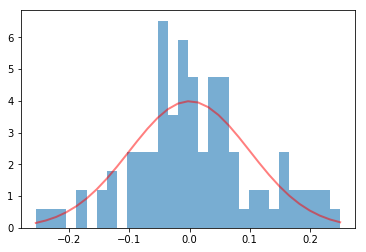

In [208]:
import matplotlib.pylab as plt
count, bins, ignored = plt.hist(dist, 30, normed=True, alpha=0.6)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * 
         np.exp( - (bins - mu)**2 / (2 * sigma**2)), 
         linewidth=2, color='r', alpha=0.5)
plt.show()


### Reshaping Arrays

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [29]:
import numpy as np

x = np.array([[1,2], [3,4]])
print x    # Prints "[[1 2]
           #          [3 4]]"
print x.T  # Prints "[[1 3]
           #          [2 4]]"



[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[1 2 3]
[1 2 3]


# $\Delta$ 6. Broadcasting

* numpy will (usually) intelligently deal with arrays of different sizes. 
* The smaller array is broadcast across the larger array so that they have compatible shapes. Note that the rules for broadcasting are not always intuitive, so be careful!

#### Visual illustration of broadcasting
  
<center>
<img src="../../images/numpy_broadcasting.png" width=60%>
</center>

**Broadcasting Rules**
> In this case, numpy looked at both operands and saw that the first (`arr1`) was a one-dimensional array of length 4 and the second was a scalar, considered a zero-dimensional object. The broadcasting rules allow numpy to:

> * *create* new dimensions of length 1 (since this doesn't change the size of the array)
* 'stretch' a dimension of length 1 that needs to be matched to a dimension of a different size.

> So in the above example, the scalar 1.5 is effectively:

> * first 'promoted' to a 1-dimensional array of length 1
* then, this array is 'stretched' to length 4 to match the dimension of `arr1`.

> After these two operations are complete, the addition can proceed as now both operands are one-dimensional arrays of length 4.

> This broadcasting behavior is in practice enormously powerful, especially because when numpy broadcasts to create new dimensions or to 'stretch' existing ones, it doesn't actually replicate the data.  In the example above the operation is carried *as if* the 1.5 was a 1-d array with 1.5 in all of its entries, but no actual array was ever created.  This can save lots of memory in cases when the arrays in question are large and can have significant performance implications.

> The general rule is: when operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions, and works its way forward, creating dimensions of length 1 as needed. Two dimensions are considered compatible when

> * they are equal to begin with, or
* one of them is 1; in this case numpy will do the 'stretching' to make them equal.

> If these conditions are not met, a `ValueError: frames are not aligned` exception is thrown, indicating that the arrays have incompatible shapes. The size of the resulting array is the maximum size along each dimension of the input arrays.

### Normal matrix addition

<img src="../../images/broadcast_1.png" width=40% align='left'>

In [233]:
mat1 = np.array([[0,0,0], [10,10,10], [20,20,20], [30,30,30]])
print(mat1)

mat2 = np.array([[0,1,2], [0,1,2], [0,1,2], [0,1,2]])
print(mat2)

print()
print("Matrix Elementwise Addition")
mat1 + mat2

[[ 0  0  0]
 [10 10 10]
 [20 20 20]
 [30 30 30]]
[[0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]]

Matrix Elementwise Addition


array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

### Broadcasting: Adding a vector to each row of a matrix

<img src="../../images/broadcast_2.png" width=40% align='left'>

In [234]:
mat1 = np.array([[0,0,0], [10,10,10], [20,20,20], [30,30,30]])
print(mat1)
print()

vec2 = np.array([0,1,2])
print(vec2)
print(vec2.shape)

print()
print("Broadcasting a vector to each row of a matrix")
mat1 + vec2

[[ 0  0  0]
 [10 10 10]
 [20 20 20]
 [30 30 30]]

[0 1 2]
(3,)

Broadcasting a vector to each row of a matrix


array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

### Broadcasting: Adding a vector to each column of a matrix

In [230]:
vec1 = np.array([0,10,20,30]).reshape(4,1)
print(vec1)

vec2 = np.array([0,1,2])
print(vec2)
print(vec2.shape)

[[ 0]
 [10]
 [20]
 [30]]
[0 1 2]
(3,)


In [227]:
vec1 + vec2

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [223]:
arr1 + vec1

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

### Broadcasting: Adding a vector to each column of a matrix

In [235]:
# Add a vector to each column of a matrix
# [[ 5  6  7]
#  [ 9 10 11]]

x = np.array([[1,2,3], [4,5,6]])
w = np.array([4,5])    # w has shape (2,)

print(x)
print(w.shape)
print ((x.T + w).T)
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print (x + np.reshape(w, (2, 1)))


[[1 2 3]
 [4 5 6]]
(2,)
[[ 5  6  7]
 [ 9 10 11]]
[[ 5  6  7]
 [ 9 10 11]]
